/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 44.35819, saving model to weights.best.h6.keras

Epoch 2: val_mae improved from 44.35819 to 41.16595, saving model to weights.best.h6.keras

Epoch 3: val_mae improved from 41.16595 to 39.88098, saving model to weights.best.h6.keras

Epoch 4: val_mae improved from 39.88098 to 35.77261, saving model to weights.best.h6.keras

Epoch 5: val_mae improved from 35.77261 to 34.03692, saving model to weights.best.h6.keras

Epoch 6: val_mae did not improve from 34.03692

Epoch 7: val_mae did not improve from 34.03692

Epoch 8: val_mae improved from 34.03692 to 33.00738, saving model to weights.best.h6.keras

Epoch 9: val_mae did not improve from 33.00738

Epoch 10: val_mae improved from 33.00738 to 32.64178, saving model to weights.best.h6.keras

Epoch 11: val_mae did not improve from 32.64178

Epoch 12: val_mae did not improve from 32.64178

Epoch 13: val_mae improved from 32.64178 to 32.52801, saving model to weights.best.h6.keras

Epoch 14: val_mae did no

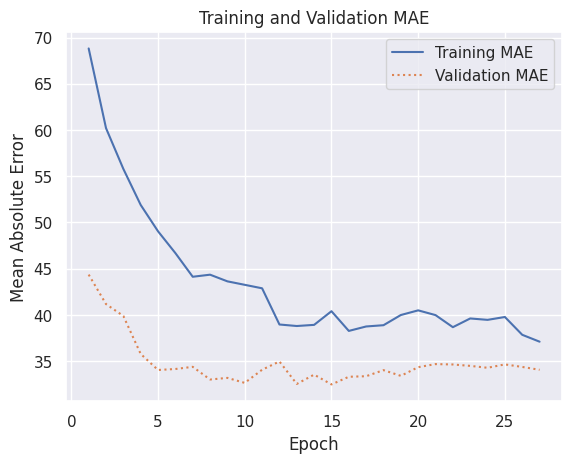

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()

# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))

model.add(Dropout(0.5))

# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

model.add(Dropout(0.5))

# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=12, restore_best_weights=True)

# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.3, patience=5)

# Define the file path where the best model weights will be saved.
filepath = "weights.best.h6.keras"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
